In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

class LinearRegression:
    
    def __init__(self, learning_rate=0.01, n_iter=1000) -> None:
        
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
        self.__is_fited_yet = False
        
        
    def __repr__(self) -> str:
        return f"LinearRegression(learning_rate={self.learning_rate}, n_iter={self.n_iter})"
    
    def __init_theta(self, x_shape):
        np.random.seed(0)
        self.theta = np.random.randn(x_shape, 1)
        
    def mean_squared_error(self, X, y):
        m = len(y)
        return 1/(2*m) * np.sum((self.predict(X) - y)**2)
    
    def r2_score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred)**2).sum()
        v = ((y - y.mean())**2).sum()
        return 1 - u/v
    
    def __gradient(self, X, y):
        m = len(y)
        y_pred = self.predict(X)
        return 1/m * X.T.dot(y_pred - y)
    
    def predict(self, X):
        # if not self.__is_fited_yet:
        #     raise Exception("The model is not fited yet")
        
        return X.dot(self.theta)
    
    def train_model(self, X, y):
        self.__is_fited_yet = True
        self.__cost_history = np.zeros(self.n_iter)
        self.__init_theta(X.shape[0])
        
        for i in tqdm(range(self.n_iter)):
            self.theta -= (self.learning_rate * self.__gradient(X, y))
            self.__cost_history[i] = self.mean_squared_error(X, y)
            

In [12]:
df = pd.read_csv('datasets/advertising.csv')

In [13]:
X = df.drop('Sales', axis=1)
y = df[['Sales']]

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
linear_estimator = LinearRegression()

In [16]:
X_test.shape, y_test.shape

((50, 3), (50, 1))

In [17]:
linear_estimator.train_model(X_test, y_test)

  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: Dot product shape mismatch, (50, 3) vs (50, 1)

In [ ]:
linear_estimator.theta

array([[42.39942764],
       [ 2.92923852]])

In [ ]:
y_pred = linear_estimator.predict(X)

ValueError: shapes (100,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

ValueError: x and y must be the same size

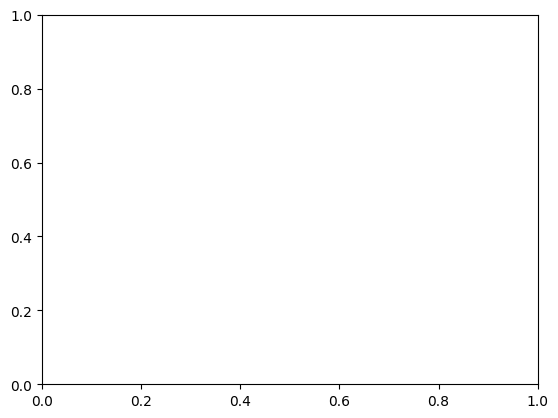

In [ ]:
plt.scatter(X, y)